<a href="https://colab.research.google.com/github/ClaudioH19/TareasML/blob/master/PROYECTO_FINAL/Notebooks/etapa_2_proyecto_ecg_etapa2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FASE 2: PROCESAMIENTO DE DATOS Y MODELO ML**

Se usara un modelo de Random Forest para entrenar e intentar predecir las clases. Este modelo requiere un alto preprocesamiento de datos, por ellos se revisará nuevamente el balance de clases, y la normalización de datos

In [ ]:
# Descargar el archivo CSV curado desde Google Drive
!pip install -q gdown
import gdown
import pandas as pd

file_id = "1Nje52iHziTZQ1rBZIP5dSl5x8Pcaa9Po"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "ecg_rr_features_curado_final.csv", quiet=False)

# Cargar el archivo CSV en un DataFrame de pandas
df = pd.read_csv("ecg_rr_features_curado_final.csv")

# Mostrar distribución de clases
print(df['label'].value_counts())

# Ver distribución de datos
print(df.describe())


# Mostrar las primeras filas del DataFrame para verificar la carga
df.head()


Downloading...
From: https://drive.google.com/uc?id=1Nje52iHziTZQ1rBZIP5dSl5x8Pcaa9Po
To: /content/ecg_rr_features_curado_final.csv
100%|██████████| 879k/879k [00:00<00:00, 130MB/s]

label
Anormal    3100
Normal     3058
Name: count, dtype: int64
          registro      fs  duracion_seq      media_mv       mstd_mV  \
count  6158.000000  6158.0   6158.000000   6158.000000  6.158000e+03   
mean    132.711270   300.0     33.088843     17.831102  1.906987e+05   
std     271.421606     0.0     11.052537   2304.862565  1.003146e+05   
min       3.000000   300.0      9.126667 -29001.455411  3.983048e+04   
25%      33.000000   300.0     30.000000   -742.435699  1.278831e+05   
50%      87.000000   300.0     30.000000     58.822723  1.658264e+05   
75%     170.000000   300.0     30.000000    847.913229  2.227718e+05   
max    6952.000000   300.0     60.880000  21174.855443  1.104316e+06   

          skewness     kurtosis    rr_mean_s     rr_std_s  
count  6157.000000  6157.000000  6158.000000  6158.000000  
mean     -0.270746     3.983144     0.827533     0.158631  
std       1.849515     7.908589     0.176711     0.115974  
min      -7.511910    -2.000000     0.321812   

,id,registro,fs,duracion_seq,media_mv,mstd_mV,skewness,kurtosis,rr_mean_s,rr_std_s,label
0,A01348,57,300,30.0,735.254007,310313.743963,-1.231753,-0.232143,0.820000,0.236288,Normal
1,A06630,76,300,60.0,-746.027887,161295.726453,-1.535039,4.487984,0.862319,0.153698,Anormal
2,A01868,91,300,30.0,1405.374751,336726.213768,-4.168619,15.886332,0.730583,0.083785,Normal
3,A04904,220,300,30.0,-155.614626,98189.005949,0.173177,-1.632677,1.124487,0.500370,Anormal
4,A02311,90,300,30.0,543.214706,145482.725942,1.526648,4.809847,0.644638,0.032014,Anormal


Separamos el Dataset en las features y la clase, además, eliminamos las variables que no aportan información para el modelo como el id, registro y el fs ya que su std = 0

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separar features (X) y target (y)
X = df[['duracion_seq',	'media_mv',	'mstd_mV'	,'skewness',	'kurtosis',	'rr_mean_s',	'rr_std_s']]
y = df['label']

# Mostrar las primeras filas
print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())


Features (X):
   duracion_seq     media_mv        mstd_mV  skewness   kurtosis  rr_mean_s  \
0          30.0   735.254007  310313.743963 -1.231753  -0.232143   0.820000   
1          60.0  -746.027887  161295.726453 -1.535039   4.487984   0.862319   
2          30.0  1405.374751  336726.213768 -4.168619  15.886332   0.730583   
3          30.0  -155.614626   98189.005949  0.173177  -1.632677   1.124487   
4          30.0   543.214706  145482.725942  1.526648   4.809847   0.644638   

   rr_std_s  
0  0.236288  
1  0.153698  
2  0.083785  
3  0.500370  
4  0.032014  

Target (y):
0     Normal
1    Anormal
2     Normal
3    Anormal
4    Anormal
Name: label, dtype: object


In [ ]:
# prompt: Aplica estandarización y hace un shuffle a la base de datos

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir X_scaled de vuelta a DataFrame para facilitar el manejo
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Concatenar las características estandarizadas y la variable objetivo
df_scaled = pd.concat([X_scaled, y], axis=1)

# Barajar (shuffle) el DataFrame estandarizado
df_shuffled = df_scaled.sample(frac=1, random_state=42).reset_index(drop=True)

# Separar nuevamente las características (X) y el target (y) del DataFrame barajado
X_shuffled = df_shuffled[['duracion_seq',	'media_mv',	'mstd_mV'	,'skewness',	'kurtosis',	'rr_mean_s',	'rr_std_s']]
y_shuffled = df_shuffled['label']

# Mostrar las primeras filas de los DataFrames estandarizados y barajados
print("\nFeatures (X) after standardization and shuffling:")
print(X_shuffled.head())
print("\nTarget (y) after shuffling:")
print(y_shuffled.head())


Features (X) after standardization and shuffling:
   duracion_seq  media_mv   mstd_mV  skewness  kurtosis  rr_mean_s  rr_std_s
0     -0.279492  0.365282 -0.626260 -0.136537 -0.427227   0.072713 -0.235843
1     -0.279492 -0.154061 -1.121976  0.610836 -0.329869  -0.293482 -1.198215
2     -0.279492  0.082126 -0.454172  0.065129 -0.606041  -0.524626 -1.266102
3     -0.279492  0.072173 -0.536399  1.345613  0.099548  -1.064609  0.599264
4     -0.279492  1.678142  0.885666  0.777886 -0.455619  -2.156328 -0.201320

Target (y) after shuffling:
0    Anormal
1     Normal
2     Normal
3    Anormal
4    Anormal
Name: label, dtype: object


Separaremos el dataset en las siguientes distribuciones 60% training, 20% validación, 20% para test

In [ ]:
# prompt: Separa el dataset en 60% training, 20% validación, 20% test

from sklearn.model_selection import train_test_split

# Dividir el dataset en training (60%) y el resto (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X_shuffled, y_shuffled, test_size=0.4, random_state=42, stratify=y_shuffled)

# Dividir el 40% restante en validation (20%) y test (20%)
# Como X_temp y y_temp son el 40% del total, dividir por 0.5 (20/40) nos da 20% del total para validation y 20% para test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Imprimir las formas de los conjuntos resultantes para verificar las divisiones
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3694, 7)
Shape of y_train: (3694,)
Shape of X_val: (1232, 7)
Shape of y_val: (1232,)
Shape of X_test: (1232, 7)
Shape of y_test: (1232,)


Crearemos un Modelo de Random Forest para clasificar binariamente los datos, y usaremos GridSearch para ajustar los hiperparámetros usando el conjunto de validación

In [ ]:
# prompt: Crearemos un Modelo de Random Forest para clasificar binariamente los datos, y usaremos GridSearch para ajustar los hiperparámetros usando el conjunto de validación

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Definir el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Definir los hiperparámetros para GridSearch
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar GridSearch con validación cruzada (por defecto usa 5 folds)
# Usamos el conjunto de entrenamiento para el entrenamiento interno de GridSearch
# y el conjunto de validación para evaluar el rendimiento de cada combinación de hiperparámetros
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Ajustar GridSearch a los datos de entrenamiento (para encontrar los mejores parámetros usando CV)
# Aunque la instrucción dice usar el conjunto de validación para ajustar, en la práctica de GridSearch
# los parámetros se ajustan sobre el conjunto de entrenamiento usando validación cruzada,
# y luego el modelo final con los mejores parámetros se evalúa en el conjunto de validación/test.
# Aquí ajustamos sobre el conjunto de entrenamiento `X_train` y `y_train`.
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("\nMejores hiperparámetros encontrados por GridSearch:")
print(grid_search.best_params_)

# Obtener el mejor modelo
best_rf_model = grid_search.best_estimator_

# Evaluar el mejor modelo en el conjunto de validación
y_val_pred = best_rf_model.predict(X_val)

# Mostrar el reporte de clasificación en el conjunto de validación
print("\nReporte de Clasificación en el conjunto de Validación:")
print(classification_report(y_val, y_val_pred))

# Opcional: Evaluar el mejor modelo en el conjunto de prueba para la evaluación final
# Este paso solo debe hacerse una vez al final del proceso de desarrollo del modelo.
# print("\nReporte de Clasificación en el conjunto de Prueba (Evaluación Final):")
# y_test_pred = best_rf_model.predict(X_test)
# print(classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 81 candidates, totalling 405 fits

Mejores hiperparámetros encontrados por GridSearch:
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}

Reporte de Clasificación en el conjunto de Validación:
              precision    recall  f1-score   support

     Anormal       0.71      0.70      0.70       620
      Normal       0.70      0.71      0.70       612

    accuracy                           0.70      1232
   macro avg       0.70      0.70      0.70      1232
weighted avg       0.70      0.70      0.70      1232



Se obtiene que la mejor combinación es:
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
# prompt: Testea el modelo de Random forest con {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}

# Evaluar el modelo con los hiperparámetros específicos proporcionados
specific_params = {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}

# Entrenar un nuevo modelo Random Forest con estos parámetros específicos
rf_model_specific = RandomForestClassifier(random_state=42, **specific_params)
rf_model_specific.fit(X_train, y_train)

# Evaluar el modelo entrenado con los parámetros específicos en el conjunto de prueba (test)
y_test_pred_specific = rf_model_specific.predict(X_test)

# Mostrar el reporte de clasificación para la evaluación con los parámetros específicos
print(f"\nReporte de Clasificación en el conjunto de Prueba con parámetros específicos: {specific_params}")
print(classification_report(y_test, y_test_pred_specific))


Reporte de Clasificación en el conjunto de Prueba con parámetros específicos: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

     Anormal       0.72      0.69      0.70       620
      Normal       0.70      0.72      0.71       612

    accuracy                           0.71      1232
   macro avg       0.71      0.71      0.71      1232
weighted avg       0.71      0.71      0.71      1232



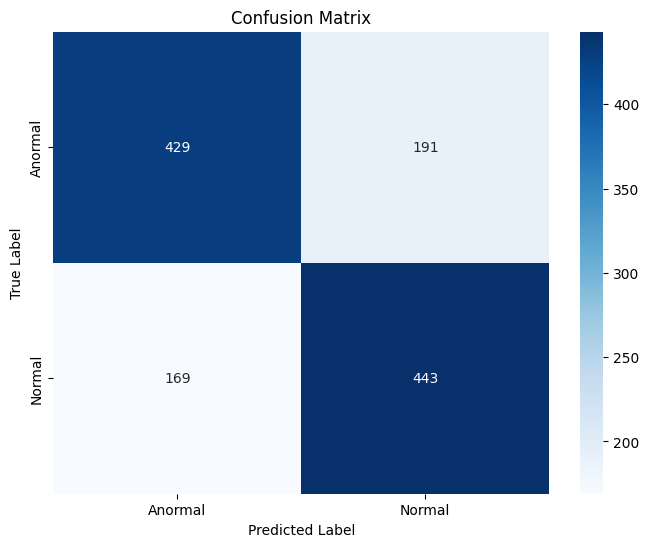


Confusion Matrix:
Rows: True Labels, Columns: Predicted Labels
Labels Order: ['Anormal', 'Normal']


array([[429, 191],
       [169, 443]])

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generar la matriz de confusión en el conjunto de prueba con las predicciones específicas
conf_matrix = confusion_matrix(y_test, y_test_pred_specific)

# Definir las etiquetas de las clases
class_labels = sorted(y_test.unique()) # Esto ordenará las etiquetas alfabéticamente: ['Anormal', 'Normal'] si existen ambas. Si no, ajusta manualmente.

class_labels = ['Anormal', 'Normal']

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Imprimir la matriz de confusión en formato de texto
print("\nConfusion Matrix:")
print("Rows: True Labels, Columns: Predicted Labels")
print("Labels Order:", class_labels)
conf_matrix


**Análisis**

El modelo de Random Forest tiene un accuracy del 71%, lo que indica un rendimiento razonable en el conjunto de prueba. Sin embargo, los valores de precisión y recall no están completamente equilibrados: la clase "Anormal" tiene un recall de 0.69, lo que sugiere que el modelo está perdiendo algunas instancias de esta clase, mientras que la clase "Normal" tiene un recall ligeramente mejor (0.72). Aunque el F1-score es de 0.71 para ambas clases, lo que muestra un balance entre precisión y recall, se observa un número significativo de falsos positivos y falsos negativos. Esto indica que el modelo podría mejorar si se ajustan los hiperparámetros o si se manejan mejor los desbalances entre clases.

Propuestas de mejoras:

1. Aumento del Número de Estimadores
Aumentar el número de estimadores (n_estimators) puede mejorar la precisión y estabilidad del modelo. Más árboles ayudan a reducir la varianza del modelo y mejorar su capacidad para generalizar sin sobreajustar los datos.

2. Reducción de Dimensionalidad (PCA)
Aplicar PCA (Análisis de Componentes Principales) puede ser útil. Reduce la dimensionalidad del conjunto de datos, eliminando redundancias y ruido, lo que puede hacer que el modelo sea más eficiente y mejorar el rendimiento general, especialmente cuando las características no aportan valor significativo.